In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\origins.csv')
data.head()

,Track ID,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Added By,Added At,Genres,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,5Eg4TsPcqNbIjd8ADMZosg,Chains,Nick Jonas X2,Nick Jonas,2015-11-20,203106,55,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,"dance pop,pop",...,0,-5.884,0,0.0454,0.0153,0.000000,0.0757,0.120,76.003,4
1,3V3iy4K6paycRmTyrjQVwi,Secrets,Heart On My Sleeve (Deluxe),Mary Lambert,2014-10-14,223405,39,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,neo mellow,...,0,-5.900,1,0.0410,0.0260,0.000135,0.2150,0.713,93.229,4
2,2f0GI2ZLUtbGqFx8t2Gk6A,I Know Places (Taylor's Version),1989 (Taylor's Version),Taylor Swift,2023-10-26,195700,63,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,pop,...,0,-5.348,1,0.0574,0.0846,0.000000,0.0710,0.626,160.015,4
3,2Od3Imc5PJeZhRPeIhpgN6,Delta 1406,31 Minutes to Takeoff,Mike Posner,2010-08-09,184546,19,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,"dance pop,pop,pop dance,pop rap",...,1,-7.334,1,0.0451,0.0138,0.000461,0.1210,0.205,87.043,4
4,5hw1uOFZK3odNqXa4sF2JZ,Stay With Me - Re-record,In The Lonely Hour (10th Anniversary Edition /...,Sam Smith,2024-08-30,172760,38,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,"pop,uk pop",...,0,-7.121,1,0.0411,0.5550,0.000041,0.1030,0.246,84.837,4


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track ID          265 non-null    object 
 1   Track Name        265 non-null    object 
 2   Album Name        265 non-null    object 
 3   Artist Name(s)    265 non-null    object 
 4   Release Date      265 non-null    object 
 5   Duration (ms)     265 non-null    int64  
 6   Popularity        265 non-null    int64  
 7   Added By          265 non-null    object 
 8   Added At          265 non-null    object 
 9   Genres            241 non-null    object 
 10  Record Label      265 non-null    object 
 11  				Danceability  265 non-null    float64
 12  Energy            265 non-null    float64
 13  Key               265 non-null    int64  
 14  Loudness          265 non-null    float64
 15  Mode              265 non-null    int64  
 16  Speechiness       265 non-null    float64
 1

In [11]:
data.shape

(265, 23)

In [13]:
#Drop irrelevant columns
data = data.drop(columns = ['Track ID',	'Track Name',	'Album Name',	'Artist Name(s)',	'Release Date', 'Added By',	'Added At',	'Genres', 'Record Label', 'Key'])
data

,Duration (ms),Popularity,\t\t\t\tDanceability,Energy,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,203106,55,0.591,0.611,-5.884,0,0.0454,0.0153,0.000000,0.0757,0.120,76.003,4
1,223405,39,0.789,0.555,-5.900,1,0.0410,0.0260,0.000135,0.2150,0.713,93.229,4
2,195700,63,0.572,0.807,-5.348,1,0.0574,0.0846,0.000000,0.0710,0.626,160.015,4
3,184546,19,0.688,0.616,-7.334,1,0.0451,0.0138,0.000461,0.1210,0.205,87.043,4
4,172760,38,0.515,0.410,-7.121,1,0.0411,0.5550,0.000041,0.1030,0.246,84.837,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,180381,75,0.621,0.415,-13.187,1,0.0543,0.3300,0.000112,0.0634,0.313,77.978,4
261,192317,75,0.619,0.610,-5.552,0,0.0298,0.0508,0.000000,0.0658,0.600,107.941,4
262,276026,30,0.578,0.459,-9.389,0,0.0420,0.6830,0.934000,0.1020,0.314,144.007,4
263,209077,71,0.467,0.247,-14.161,1,0.0314,0.9060,0.015700,0.1570,0.258,140.232,4


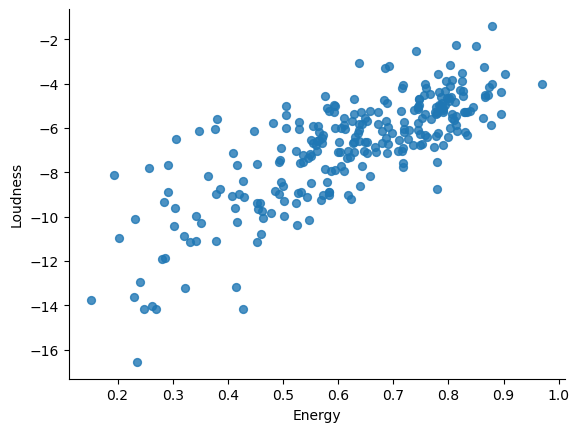

In [15]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Energy', y='Loudness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame
numerical_cols = ['Duration (ms)', 'Popularity', 'Tempo', 'Time Signature', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the selected features
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [19]:
#Trainimg and Testing Model
##Defining Feature
X = data.drop(columns = ['Mode'])
y = data['Mode']

##Spliting Data Into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [21]:
X_train.shape, X_test.shape

((212, 12), (53, 12))

In [23]:
y_train.shape, y_test.shape

((212,), (53,))

In [25]:
data['Mode'].value_counts()

Mode
1    167
0     98
Name: count, dtype: int64

<Axes: xlabel='Mode'>

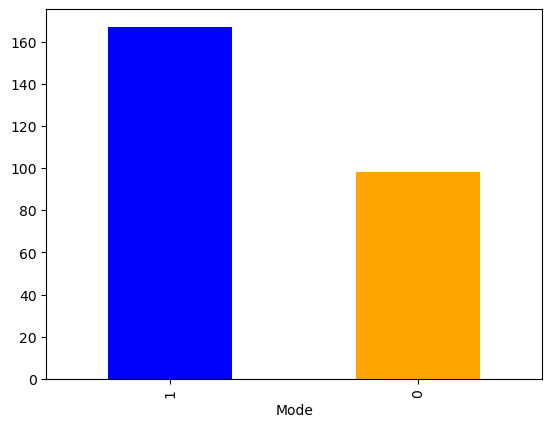

In [27]:
data['Mode'].value_counts().plot.bar(color=['blue','orange'])

In [29]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object with desired parameters (e.g., sampling_strategy, k_neighbors)
smote = SMOTE(random_state=42)  # You can adjust the random_state for reproducibility

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the class distribution after undersampling
print(pd.Series(y_train_resampled).value_counts())

Mode
1    134
0    134
Name: count, dtype: int64


In [31]:
results = []

In [33]:
def evaluate_metrics(model, yt, yp):
    results_pos = {}
    results_pos['model'] = model
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [35]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [37]:
lr_model = LogisticRegression()
search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')  # Initialize GridSearchCV
search.fit(X_train_resampled, y_train_resampled)  # Fit to your resampled training data

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [39]:
print(search.best_params_)
print(search.best_estimator_)

{'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01)


In [41]:
y_pred_lr = search.predict(X_test)

In [43]:
results.append(evaluate_metrics("Logistics Regression",y_test, y_pred_lr))

In [45]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [47]:
dt_model = DecisionTreeClassifier(random_state=123)  # Initialize the classifier
search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')

In [49]:
search.fit(X_train_resampled, y_train_resampled)
y_pred_dt = search.predict(X_test)

In [51]:
print(search.best_params_)
print(search.best_estimator_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=123)


In [53]:
results.append(evaluate_metrics("Decision Tree",y_test, y_pred_dt))

In [55]:
from sklearn import tree

def plot_decision_tree(model, feature_names):
    plt.subplots(figsize=(25, 20))
    tree.plot_tree(model,
                       feature_names=feature_names,
                       filled=True)
    plt.show()

In [57]:
feature_names = X.columns.values

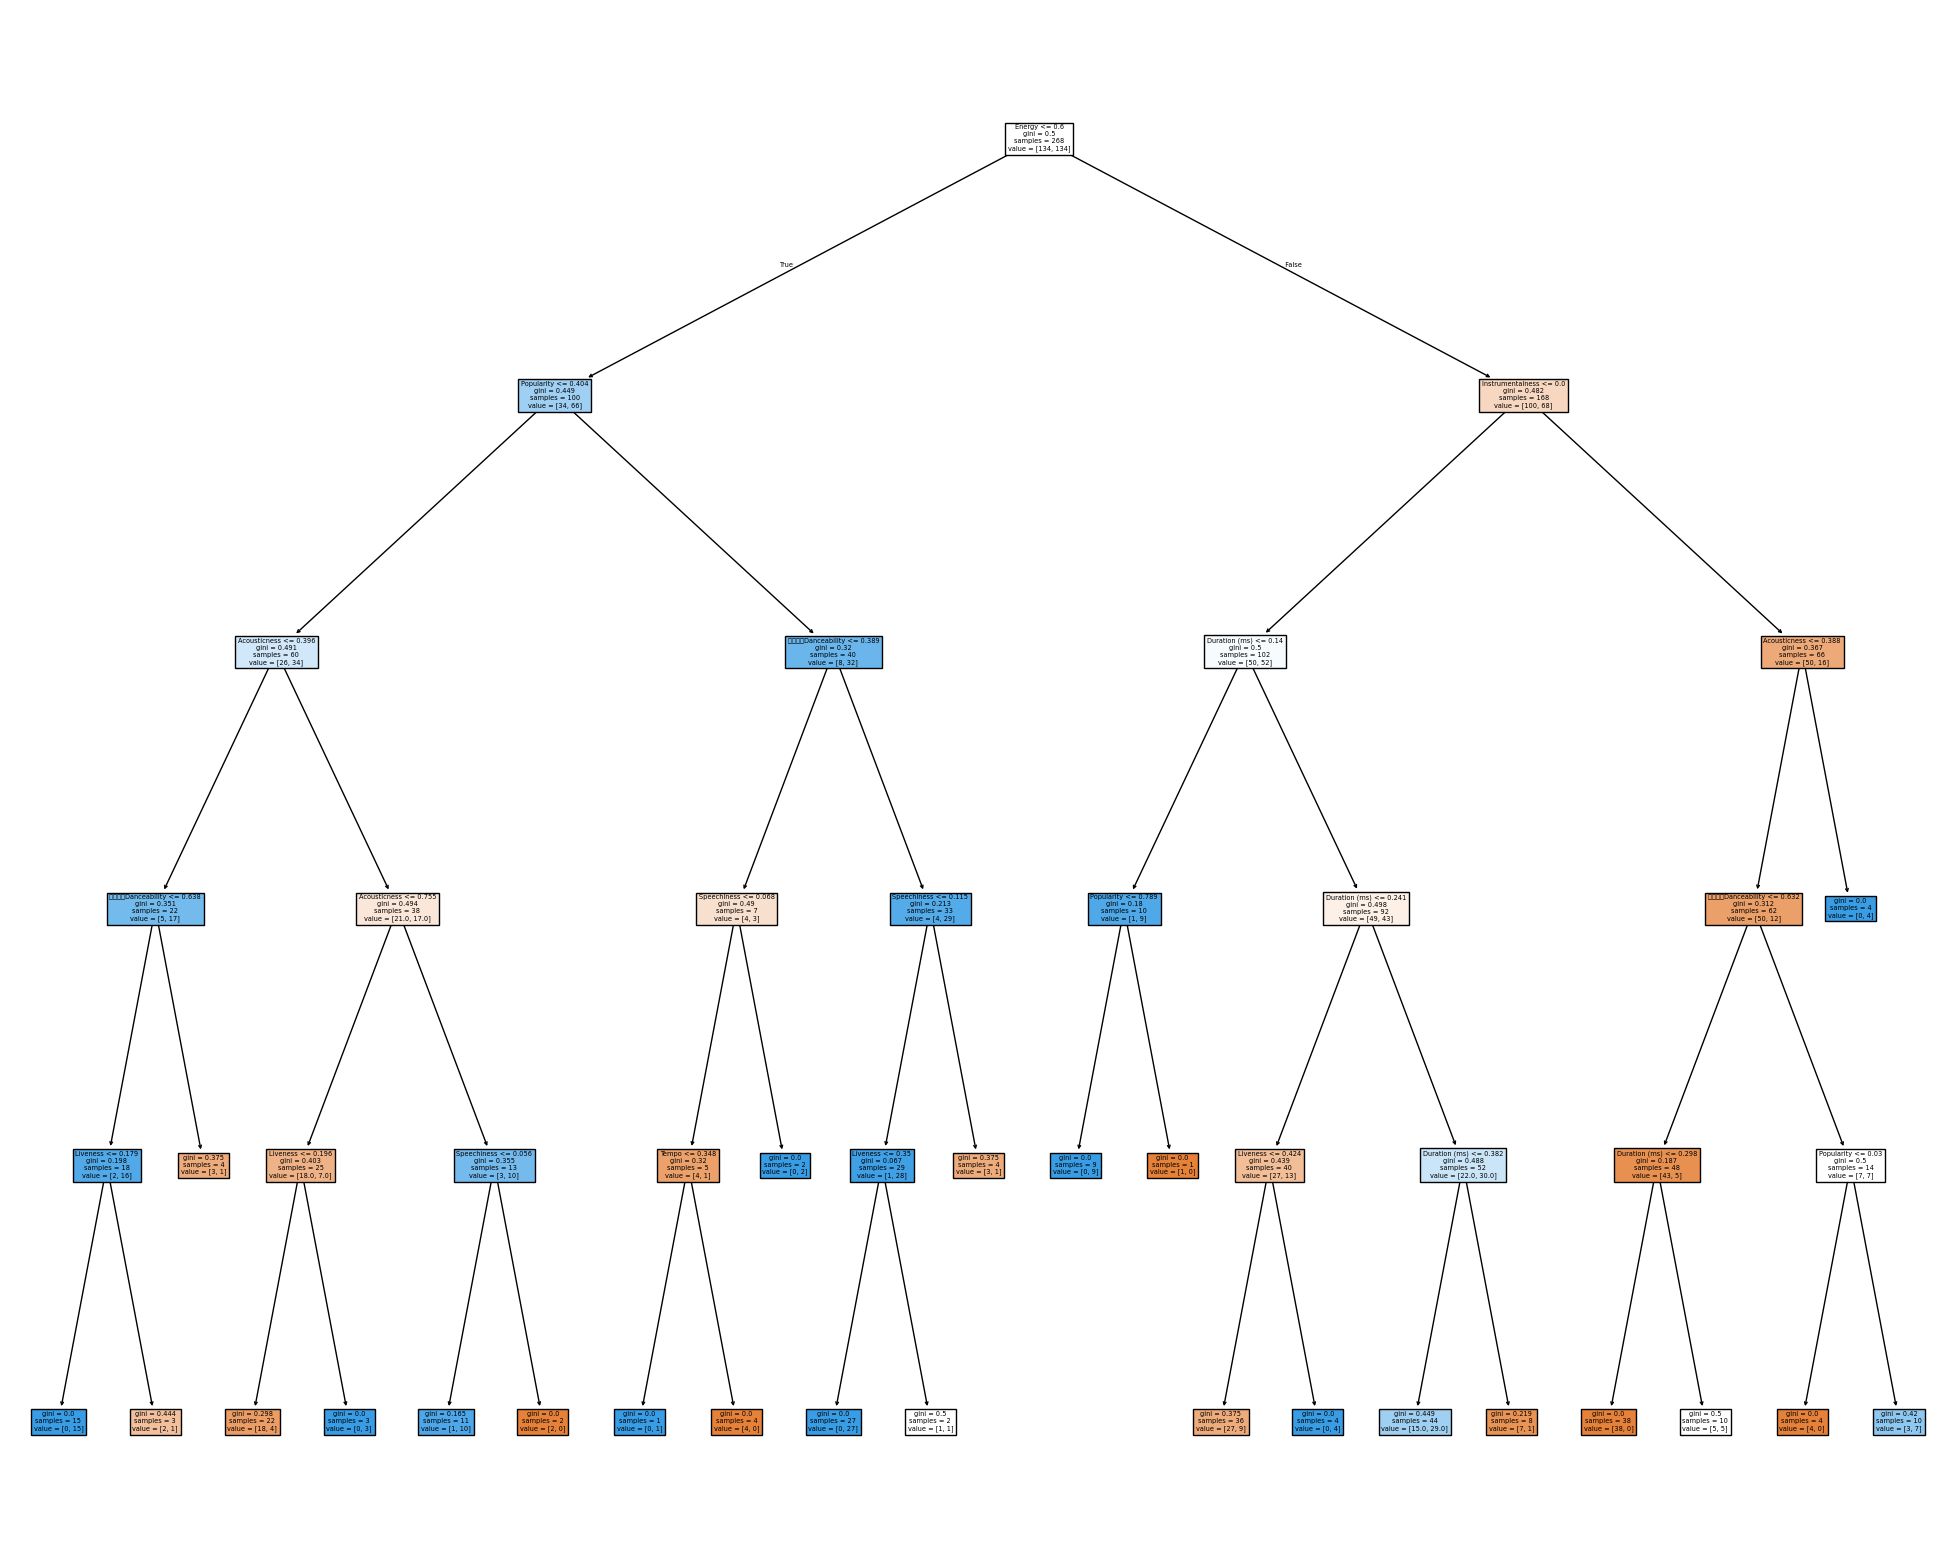

In [59]:
plot_decision_tree(search.best_estimator_, feature_names)

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
rf = RandomForestClassifier()
param_dist = {
    'bootstrap': [True],
    'max_depth': randint(80, 120), 
    'max_features': ['sqrt', 'log2', 2, 3], 
    'min_samples_leaf': randint(2, 6), 
    'min_samples_split': randint(5, 15), 
    'n_estimators': [100, 300, 1000]
}

search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                    cv=3, n_jobs=-1, verbose=2)

In [63]:
search = GridSearchCV(estimator=rf, param_grid=param_grid,scoring='accuracy', cv=3)
search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [64]:
print(search.best_params_)
print(search.best_estimator_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
RandomForestClassifier(criterion='entropy', min_samples_leaf=2)


In [65]:
y_pred_rf = search.predict(X_test)

In [66]:
results.append(evaluate_metrics("Random Forest",y_test, y_pred_rf))

In [67]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

In [68]:
search = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,scoring='accuracy')
search.fit(X_train_resampled, y_train_resampled)
y_pred_svm = search.predict(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.444 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.509 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.463 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.667 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.444 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.679 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.472 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

In [69]:
print(search.best_params_)
print(search.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)


In [70]:
results.append(evaluate_metrics("SVC",y_test, y_pred_svm))

In [79]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49],  # Test different values of 'k' or 'n_neighbors'
    'weights': ['uniform', 'distance'],  # Test different weight functions
    'metric': ['euclidean', 'manhattan']  # Test different distance metrics
}

In [81]:
knn_model = KNeighborsClassifier()

In [83]:
search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')  # Set up GridSearchCV with your model, grid, and evaluation parameters

In [85]:
search.fit(X_train_resampled, y_train_resampled)  # Resampled data from previous step
y_pred_knn = search.predict(X_test)
results.append(evaluate_metrics("KNN",y_test, y_pred_knn))

In [87]:
print(search.best_params_)
print(search.best_estimator_)

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')


In [89]:
from xgboost import XGBClassifier
#Create a Gradient Boosting Classifier
model =XGBClassifier(objective='binary:logistic',eval_metric='mlogloss')

In [91]:
param_grid = {'learning_rate': [0.1*(n+1) for n in range(5)],
             'n_estimators' : [2*n+1 for n in range(5)]}

param_grid

{'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5],
 'n_estimators': [1, 3, 5, 7, 9]}

In [93]:
!pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 640.0 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.1 MB 1.7 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/11.1 MB 6.1 MB/s eta 0:00:02
   ---- ----------------------------------- 1.4/11.1 MB 9.7 MB/s eta 0:00:01
   -------- ------------------------------- 2.3/11.1 MB 11.2 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/11.1 MB 12.7 MB/s eta 0:00:01
   -------------- ------------------------- 4.0/11.1 MB 14.0 MB/s eta 0:00:01
   ----------------- ---------------------- 4.9/11.1 MB 14.1 MB/s eta 0:00:01
   -------------------- ------------------- 5.6/11.1 MB 15.0 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.1 MB 15.5 MB/s eta 0:00:01
   --------------------------- ------------ 7.8/11.1 MB 16.0 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.1 MB 16.2 MB/s eta 0:00

  You can safely remove it manually.


In [94]:
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring="neg_log_loss")
search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4,
                                           0.5],
                         'n_estimators': [1, 3, 5, 7, 9]},
             scoring='neg_log_loss')

In [95]:
print(search.best_params_)
print(search.best_estimator_)

{'learning_rate': 0.4, 'n_estimators': 3}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.4, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=3,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


In [96]:
y_pred_gbx = search.predict(X_test)

In [98]:
results.append(evaluate_metrics("GBX",y_test, y_pred_gbx))

In [103]:
results

[{'model': 'Logistics Regression',
  'accuracy': 0.5849056603773585,
  'recall': 0.48484848484848486,
  'precision': 0.7619047619047619,
  'f1score': 0.5925925925925926},
 {'model': 'Decision Tree',
  'accuracy': 0.4716981132075472,
  'recall': 0.5151515151515151,
  'precision': 0.5862068965517241,
  'f1score': 0.5483870967741935},
 {'model': 'Random Forest',
  'accuracy': 0.6226415094339622,
  'recall': 0.7575757575757576,
  'precision': 0.6756756756756757,
  'f1score': 0.7142857142857143},
 {'model': 'SVC',
  'accuracy': 0.660377358490566,
  'recall': 0.6363636363636364,
  'precision': 0.7777777777777778,
  'f1score': 0.7},
 {'model': 'KNN',
  'accuracy': 0.5660377358490566,
  'recall': 0.5757575757575758,
  'precision': 0.6785714285714286,
  'f1score': 0.6229508196721312},
 {'model': 'GBX',
  'accuracy': 0.5471698113207547,
  'recall': 0.6363636363636364,
  'precision': 0.6363636363636364,
  'f1score': 0.6363636363636364}]

In [105]:
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def visualize_eval_metrics(results):
    """
    Visualizes evaluation metrics using a bar chart.

    Args:
        results (list): A list of dictionaries, where each dictionary contains evaluation
                        metrics for a model (e.g., accuracy, precision, recall, f1-score).
    """

    # Create a DataFrame with all metrics, filling missing values with 0
    df = pd.DataFrame(results).fillna(0)
    print(df)

    # Get the number of metrics (excluding the model name)
    num_metrics = len(df.columns) - 1

    # Create an array for x-axis positions
    x = np.arange(num_metrics)

    # Width of each bar
    width = 0.1

    # Get model names for labels and metric names for x-axis ticks
    model_names = df['model'].tolist()
    metric_names = df.columns[1:].tolist()

    # Create the figure and axes
    figure(figsize=(12, 6), dpi=100)

    # Create bars for each model and metric
    for i, model_name in enumerate(model_names):
        plt.bar(x + i * width, df.loc[df['model'] == model_name, metric_names].values.flatten(),
                width, label=model_name)

    # Customize the plot
    plt.xticks(x + width * (len(model_names) - 1) / 2, metric_names)  # Center x-axis ticks
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Score")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

                  model  accuracy    recall  precision   f1score
0  Logistics Regression  0.584906  0.484848   0.761905  0.592593
1         Decision Tree  0.471698  0.515152   0.586207  0.548387
2         Random Forest  0.622642  0.757576   0.675676  0.714286
3                   SVC  0.660377  0.636364   0.777778  0.700000
4                   KNN  0.566038  0.575758   0.678571  0.622951
5                   GBX  0.547170  0.636364   0.636364  0.636364


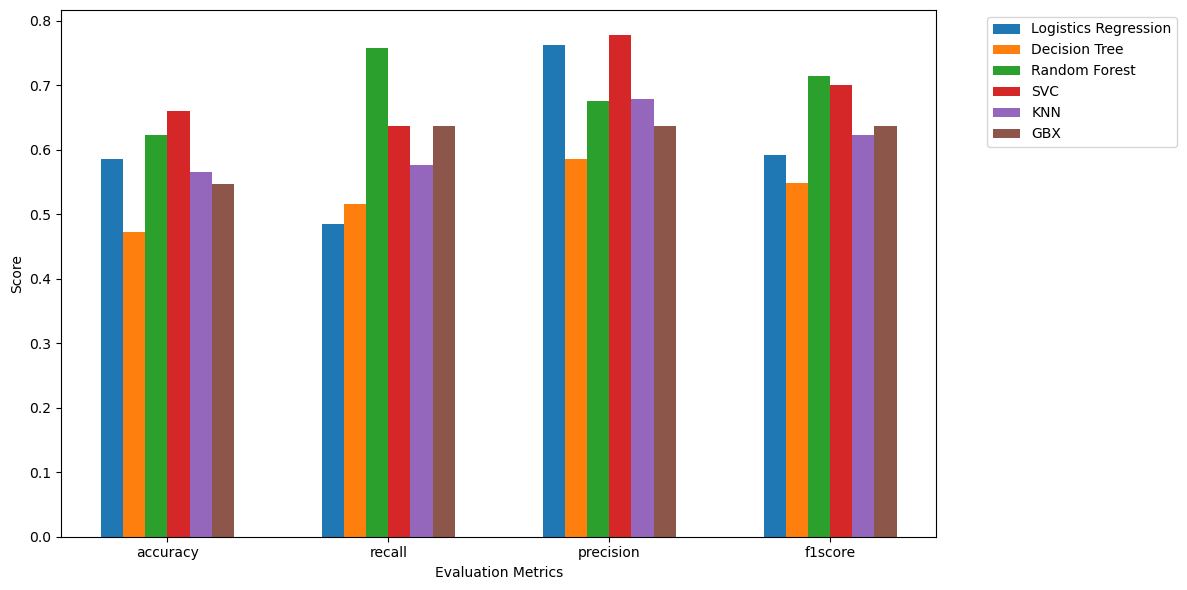

In [107]:
visualize_eval_metrics(results)